In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
otto_train = pd.read_csv('./train.csv/train.csv', index_col='id'); otto_train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
# Number of features
print otto_train.shape[1]

94


In [4]:
# Number of examples
print otto_train.shape[0]

61878


#### There are 61,878 examples with 93 features and a response variable.

<p>To reduce the dimensionality of the data, we could reduce the dimension of the data
by using non-linear dimensionality reduction techniques such as t-SNE
t-distributed Stochastic Neighbor Embedding
</p>

In [5]:
otto_train.columns

Index([u'feat_1', u'feat_2', u'feat_3', u'feat_4', u'feat_5', u'feat_6', u'feat_7', u'feat_8', u'feat_9', u'feat_10', u'feat_11', u'feat_12', u'feat_13', u'feat_14', u'feat_15', u'feat_16', u'feat_17', u'feat_18', u'feat_19', u'feat_20', u'feat_21', u'feat_22', u'feat_23', u'feat_24', u'feat_25', u'feat_26', u'feat_27', u'feat_28', u'feat_29', u'feat_30', u'feat_31', u'feat_32', u'feat_33', u'feat_34', u'feat_35', u'feat_36', u'feat_37', u'feat_38', u'feat_39', u'feat_40', u'feat_41', u'feat_42', u'feat_43', u'feat_44', u'feat_45', u'feat_46', u'feat_47', u'feat_48', u'feat_49', u'feat_50', u'feat_51', u'feat_52', u'feat_53', u'feat_54', u'feat_55', u'feat_56', u'feat_57', u'feat_58', u'feat_59', u'feat_60', u'feat_61', u'feat_62', u'feat_63', u'feat_64', u'feat_65', u'feat_66', u'feat_67', u'feat_68', u'feat_69', u'feat_70', u'feat_71', u'feat_72', u'feat_73', u'feat_74', u'feat_75', u'feat_76', u'feat_77', u'feat_78', u'feat_79', u'feat_80', u'feat_81', u'feat_82', u'feat_83', u'feat

In [6]:
feature_columns = otto_train.columns[:-1]

In [7]:
otto_features = otto_train[feature_columns]

In [8]:
print otto_features.shape

(61878, 93)


In [61]:
%run scripts/helper.py

In [38]:
otto_train.target = get_encoded_labels(get_response(otto_train, 'target'))

In [39]:
otto_train.target.head()

id
1     0
2     0
3     0
4     0
5     0
Name: target, dtype: int32

In [9]:
# lets take a stratitfied shuffle split of the dataset
# maintaining class distribution in a subset of the original 
# training set

from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(otto_train.target.values, n_iter=3, train_size=1000, random_state=12)
train_idx, test_idx = next(iter(sss))

In [10]:
X_train = otto_features.ix[train_idx]
y_train = otto_train.target.ix[train_idx]

In [12]:
# first reduce the dimensions using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=30, whiten=True)
X_train = pca.fit_transform(X_train)

In [13]:
from sklearn.manifold import TSNE

In [14]:
model = TSNE(n_components=2, random_state=12)
X_train = model.fit_transform(X_train)

In [63]:
%run scripts/visualization.py

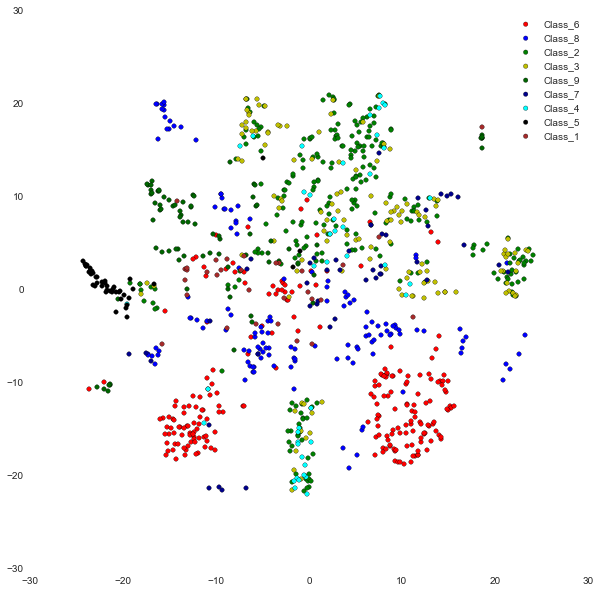

In [21]:
visualize_clusters(X_train, y_train)

### As you can see class 2(dark green) is very difficult to separate from other classes.
<p>Some classes like Class 5(black) are very easy to separate from other classes.</p>

## Feature Importance 

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest = RandomForestClassifier(n_estimators=250, random_state=12)

In [66]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [67]:
def print_feature_importances(forest):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    
    # print out the features
    print ('Feature ranking: ')
    
    for f in range(10):
        print ("%d. feature %d (%f)" %( f + 1, indices[f], importances[indices[f]]))

In [68]:
print_feature_importances(forest)

Feature ranking: 
1. feature 33 (0.042139)
2. feature 10 (0.034991)
3. feature 24 (0.033229)
4. feature 59 (0.033148)
5. feature 39 (0.029694)
6. feature 66 (0.027054)
7. feature 13 (0.026239)
8. feature 85 (0.024394)
9. feature 41 (0.023949)
10. feature 25 (0.023842)


In [69]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

five_most_important_features = [X_train.columns[indices[f]] for f in range(5)]
five_most_important_features.append('target')

In [70]:
train_subset = otto_train.ix[train_idx, five_most_important_features]

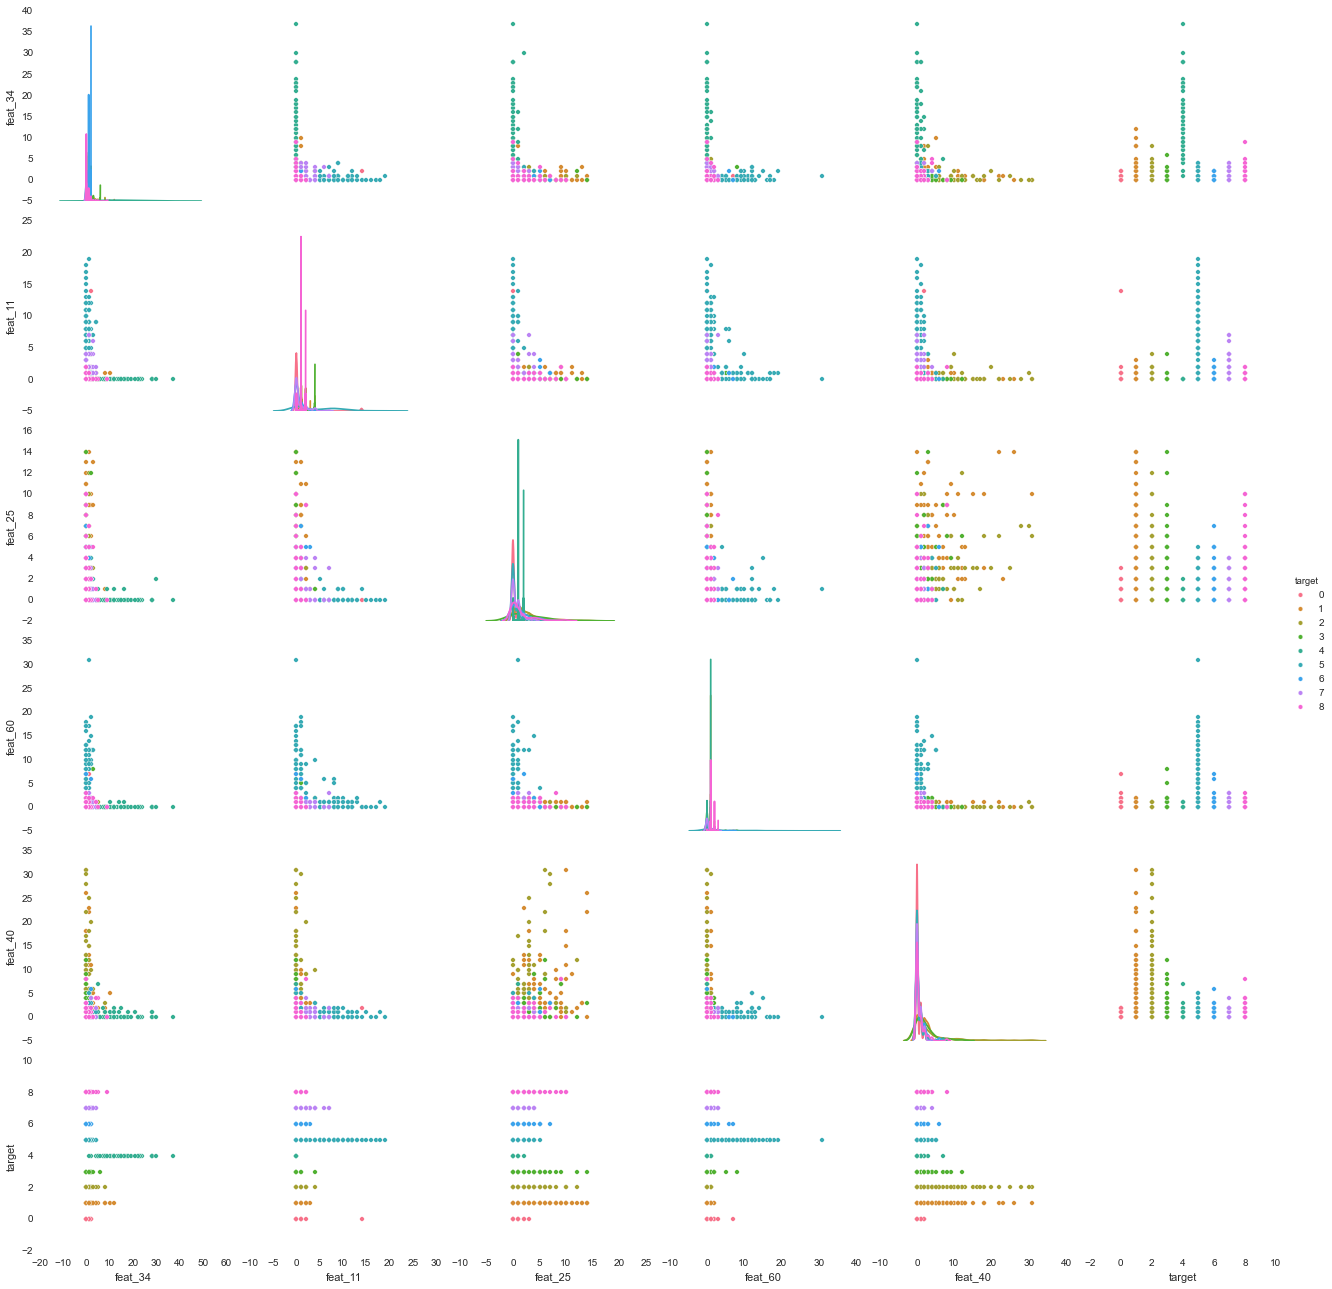

In [71]:
# lets visualize these features
visualize_important_variables(train_subset)